Introduction

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well −

Lazy learning algorithm − KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.

Non-parametric learning algorithm − KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.

How does the KNN algorithm work?

Let’s take a simple case to understand this algorithm. Following is a spread of red circles (RC) and green squares (GS) :
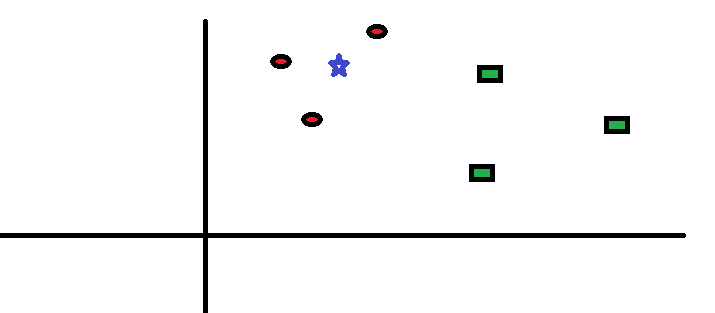

You intend to find out the class of the blue star (BS). BS can either be RC or GS and nothing else. The “K” is KNN algorithm is the nearest neighbor we wish to take the vote from. Let’s say K = 3. Hence, we will now make a circle with BS as the center just as big as to enclose only three datapoints on the plane. Refer to the following diagram for more details:

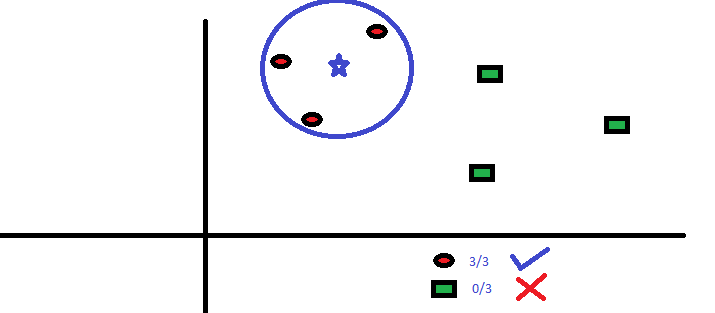

The three closest points to BS is all RC. Hence, with a good confidence level, we can say that the BS should belong to the class RC. Here, the choice became very obvious as all three votes from the closest neighbor went to RC. The choice of the parameter K is very crucial in this algorithm. Next, we will understand what are the factors to be considered to conclude the best K.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np



from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [ ]:
# reading the CSV file
df = pd.read_csv("diabetes.csv")

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# I have removed the zeros values to calculate the mean value

zero_remove = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

for column in zero_remove :
    df[column] = df[column].replace(0 , np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN , mean)

In [ ]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


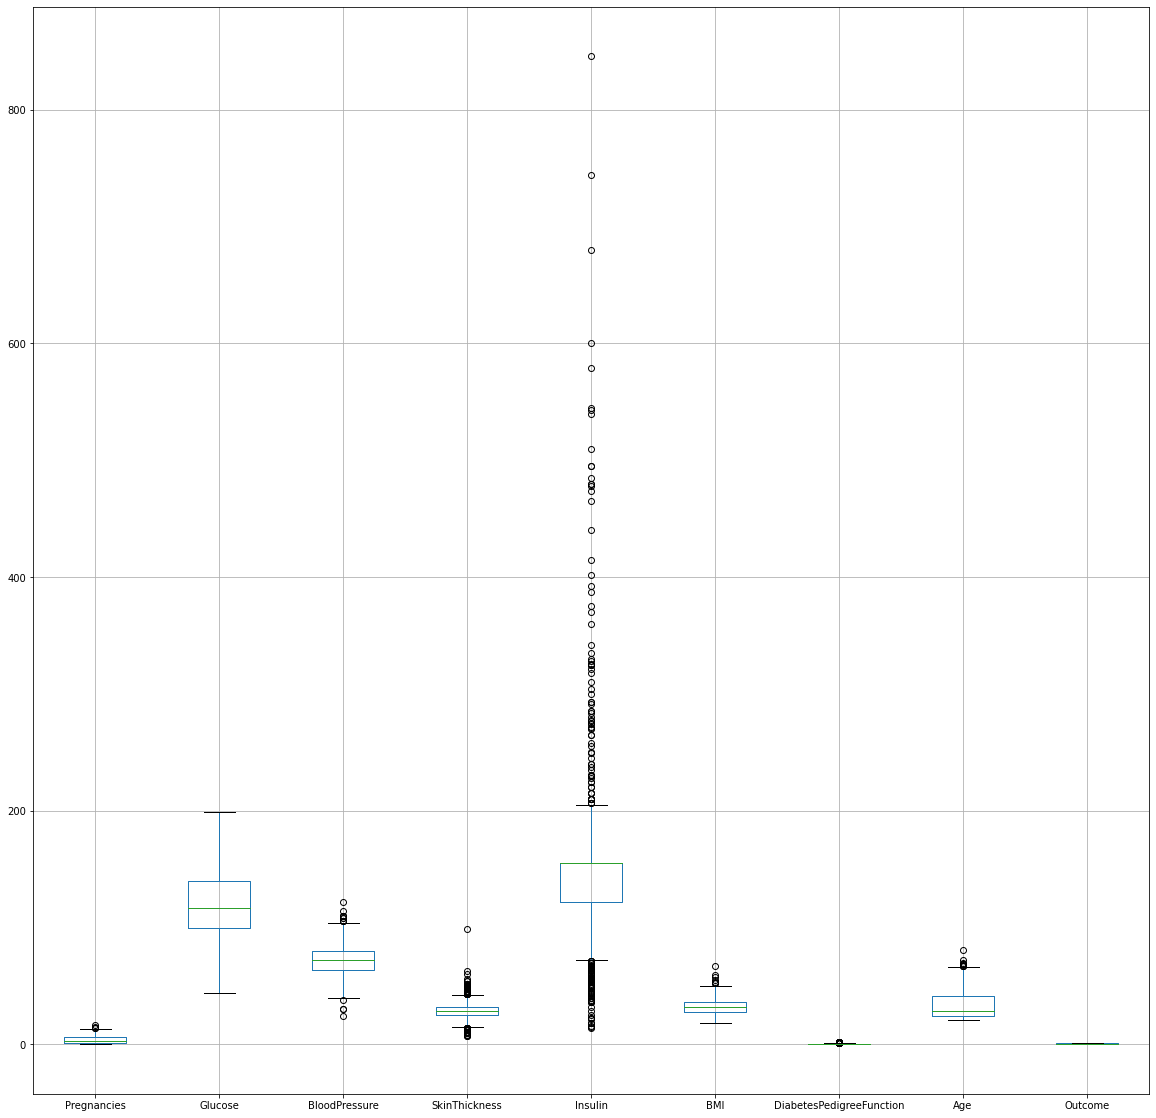

In [ ]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
     

df.boxplot(column=columns  , figsize=(20,20))

In [ ]:
X = df.iloc[: , 0:8]
y = df.iloc[: , 8]

MY OWN CODE FROM SCRATCH

In [ ]:
# my own function for knn algorithm
def KNN(K , X_train , X_test , y_train ):
  
  y_predd = []

  for i in range(len(X_test)):
      


      eculidean_dis=[] # list of eculidean distances 
      index_ = []  # the indecies of the minimum values 
      y_val=[]  # the values in the indecies 

      # calculation the eculidean distances
      for j in range(len(X_train)):
          s =   np.sqrt(abs(np.sum(((X_test[i,:]) - (X_train[j,:]))**2)))
          eculidean_dis.append(s)


      #putting the indecies of minimum eculidean distances in index_ list  
      for x in range(K):
          m = min(eculidean_dis)
          y = eculidean_dis.index(m)
          index_.append(y)
          eculidean_dis[y]=9999


      # getting the values of y_train by indecies in index_ list        
      for p in index_:
          y_val.append(y_train[p])

      # comparing outputs counts and choose the majority output
      if y_val.count(1)>y_val.count(0):
          y_predd.append(1)

      else:
          y_predd.append(0)
  return y_predd

In [ ]:
#dictionary of metrics
scoring_class = {'accuracy_score':accuracy_score,
                 'f1_score':f1_score,
                 'confusion_matrix':confusion_matrix,
                 'classification_report':classification_report}

In [ ]:
from sklearn.model_selection import KFold 

k = 4
kf = KFold(n_splits=k, random_state=None)

for train_index , test_index in kf.split(X):
  

  

  X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
  y_train , y_test = y[train_index] , y[test_index]

  sc_X = StandardScaler()

  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  

  y_train= y_train.to_numpy()

  

  k = [3,13,33]

  for k_ in k:
    for name,score in scoring_class.items():
      print( "for k=" , k_ , "the" , name ,  score(y_test , KNN(k_ , X_train , X_test , y_train) ))


  print("-----------------------------------------------------------------------------------------")


for k= 3 the accuracy_score 0.7604166666666666
for k= 3 the f1_score 0.6406250000000001
for k= 3 the confusion_matrix [[105  18]
 [ 28  41]]
for k= 3 the classification_report               precision    recall  f1-score   support

           0       0.79      0.85      0.82       123
           1       0.69      0.59      0.64        69

    accuracy                           0.76       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.76      0.76       192

for k= 13 the accuracy_score 0.75
for k= 13 the f1_score 0.6307692307692307
for k= 13 the confusion_matrix [[103  20]
 [ 28  41]]
for k= 13 the classification_report               precision    recall  f1-score   support

           0       0.79      0.84      0.81       123
           1       0.67      0.59      0.63        69

    accuracy                           0.75       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.75      0.75       192

for 

BY USING SKLEARN LIBRARY

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


By comparing my model with the sklearn library model results , the results are exactly same!

In [ ]:
from sklearn.model_selection import KFold 

k = 4
kf = KFold(n_splits=k, random_state=None)

for train_index , test_index in kf.split(X):
  

  

  X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
  y_train , y_test = y[train_index] , y[test_index]

  sc_X = StandardScaler()

  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  

  y_train= y_train.to_numpy()

  

  k = [3,13,33]

  for k_ in k :
    classifier = KNeighborsClassifier(n_neighbors=k_ , p=2 , metric='euclidean')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    for name,score in scoring_class.items():
      print( "for k=" , k_ , "the" , name , score(y_test , y_pred))



  print("-----------------------------------------------------------------------------------------")

for k= 3 the accuracy_score 0.7604166666666666
for k= 3 the f1_score 0.6406250000000001
for k= 3 the confusion_matrix [[105  18]
 [ 28  41]]
for k= 3 the classification_report               precision    recall  f1-score   support

           0       0.79      0.85      0.82       123
           1       0.69      0.59      0.64        69

    accuracy                           0.76       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.76      0.76       192

for k= 13 the accuracy_score 0.75
for k= 13 the f1_score 0.6307692307692307
for k= 13 the confusion_matrix [[103  20]
 [ 28  41]]
for k= 13 the classification_report               precision    recall  f1-score   support

           0       0.79      0.84      0.81       123
           1       0.67      0.59      0.63        69

    accuracy                           0.75       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.75      0.75       192

for 

In [ ]:
from sklearn.model_selection import KFold 

k = 4
kf = KFold(n_splits=k, random_state=None)

for train_index , test_index in kf.split(X):
  

  

  X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
  y_train , y_test = y[train_index] , y[test_index]

  sc_X = StandardScaler()

  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  

  y_train= y_train.to_numpy()

  

  k = [1]

  for k_ in k :
    classifier = KNeighborsClassifier(n_neighbors=k_ , p=2 , metric='euclidean')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    for name,score in scoring_class.items():
      print( "for k=" , k_ , "the" , name , score(y_test , y_pred))



  print("-----------------------------------------------------------------------------------------")

for k= 1 the accuracy_score 0.6875
for k= 1 the f1_score 0.53125
for k= 1 the confusion_matrix [[98 25]
 [35 34]]
for k= 1 the classification_report               precision    recall  f1-score   support

           0       0.74      0.80      0.77       123
           1       0.58      0.49      0.53        69

    accuracy                           0.69       192
   macro avg       0.66      0.64      0.65       192
weighted avg       0.68      0.69      0.68       192

-----------------------------------------------------------------------------------------
for k= 1 the accuracy_score 0.65625
for k= 1 the f1_score 0.547945205479452
for k= 1 the confusion_matrix [[86 30]
 [36 40]]
for k= 1 the classification_report               precision    recall  f1-score   support

           0       0.70      0.74      0.72       116
           1       0.57      0.53      0.55        76

    accuracy                           0.66       192
   macro avg       0.64      0.63      0.64       192
we